# Start of supervised machine learning

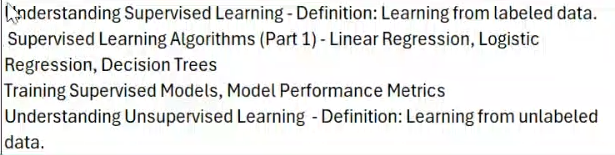

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('data/House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [112]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [113]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [115]:
# as we are just playing on two cols
X = df[['number of bedrooms','Built Year']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print(X_train.head())
print(y_train.head())


      number of bedrooms  Built Year
3006                   5        1972
9209                   3        2004
2781                   3        2009
9311                   3        1959
8639                   2        2005
3006    1820000
9209     450000
2781     284000
9311     390000
8639     473000
Name: Price, dtype: int64


In [116]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [117]:
y_test_np = y_test.to_numpy()
y_test_np

array([546800, 550000, 399950, ..., 300000, 499000, 380000], dtype=int64)

In [118]:
y_pred = model.predict(X_test)
y_pred

array([610819.88342958, 611600.52424776, 495241.2867817 , ...,
       378830.00659442, 380391.28823078, 260389.06027986])

In [119]:
mse1 = mean_squared_error(y_test_np, y_pred)
mse1

132600897465.18297

In [120]:
mae1 = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae1

220854.83893606486

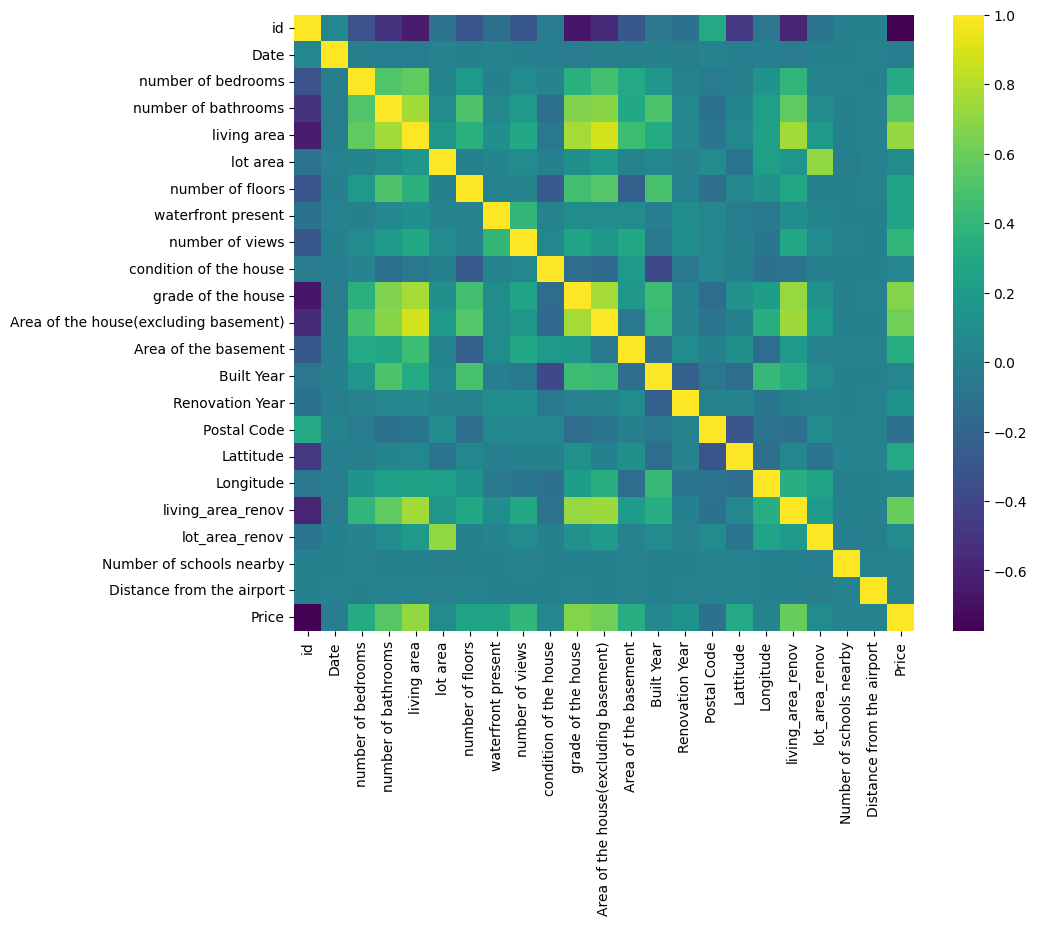

In [121]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='viridis')
plt.show()

In [122]:
correlation['Price'].sort_values(ascending=False)

Price                                    1.000000
living area                              0.712276
grade of the house                       0.671805
Area of the house(excluding basement)    0.615179
living_area_renov                        0.585021
number of bathrooms                      0.532031
number of views                          0.394954
Area of the basement                     0.330499
number of bedrooms                       0.308165
Lattitude                                0.297570
waterfront present                       0.263943
number of floors                         0.262649
Renovation Year                          0.133362
lot area                                 0.082117
lot_area_renov                           0.075697
Built Year                               0.050936
condition of the house                   0.040609
Longitude                                0.024807
Number of schools nearby                 0.009904
Distance from the airport                0.004074


In [123]:
most_depending = correlation["Price"].sort_values(ascending=False)[1:6].index.to_list()
most_depending

['living area',
 'grade of the house',
 'Area of the house(excluding basement)',
 'living_area_renov',
 'number of bathrooms']

In [124]:
# we can observe that Price is mostly dependent on ['living area', 'grade of the house', 'Area of the house(excluding basement)', 'living_area_renov', 'number of bathrooms']
X = df[most_depending]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)
print(X_train.head())
print(y_train.head())

      living area  grade of the house  Area of the house(excluding basement)  \
3006         3880                  10                                   3880   
9209         2180                   8                                   2180   
2781         1880                   7                                   1880   
9311         1180                   7                                   1180   
8639         1510                   8                                   1510   

      living_area_renov  number of bathrooms  
3006               3470                 3.00  
9209               2540                 2.50  
2781               2180                 2.50  
9311               1510                 1.50  
8639               1640                 1.75  
3006    1820000
9209     450000
2781     284000
9311     390000
8639     473000
Name: Price, dtype: int64


In [125]:
print(X_test.head(), y_test.head())

       living area  grade of the house  Area of the house(excluding basement)  \
7983          2170                   8                                   1420   
6466          2230                   7                                   1480   
10306         1720                   7                                   1720   
1217          2080                   8                                   2080   
12463         3160                   8                                   1930   

       living_area_renov  number of bathrooms  
7983                2390                 2.25  
6466                1760                 2.75  
10306               1870                 1.00  
1217                1730                 2.75  
12463               2380                 3.00   7983     546800
6466     550000
10306    399950
1217     940000
12463    545000
Name: Price, dtype: int64


In [126]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [127]:
y_test_np = y_test.to_numpy()
y_test_np

array([546800, 550000, 399950, ..., 300000, 499000, 380000], dtype=int64)

In [128]:
y_pred = model2.predict(X_test)
y_pred

array([624810.75037111, 491536.11865338, 414845.62866741, ...,
       175189.17866001, 363383.71952567, 305799.62704469])

In [129]:
mse2 = mean_squared_error(y_test_np, y_pred)
mse2

64067902379.22244

In [130]:
mae2 = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae2

155556.01612550256

In [140]:
print(f"improvement in mean sqaured error: {mse1/mse2} times \nimprovement in mean absolute error: {mae1/mae2} times") # we can observe almost 2x improvement in mse and 1.5x in mae

improvement in mean sqaured error: 2.069693130895856 times 
improvement in mean absolute error: 1.419776903761017 times
